## 問題描述
![](./img/png01.png)

In [1]:
# to avoid sklearn warnings
import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy
import pandas
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# the dataset is too larage please download from 'https://www.kaggle.com/wendykan/lending-club-loan-data'
DF = pandas.read_csv('../loan.csv')
# drop entire null columns
DF = DF.dropna(axis=1,how='all')
DF['emp_length'] = DF.emp_length.astype(str)
DF.head(5)

C:\Users\Wade\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [3]:
DF.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


## Choose the needed columns

欄位           | 類別
--------------|------------------
id            |       feature
loan_amnt       |       feature
int_rate          |     feature
grade               |   -
sub_grade            |  label
term                  | feature
home_ownership         |feature
loan_status            |feature
purpose                |feature
verification_status    |feature

In [4]:
# Select the columns we need
column_needed = ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade', 'sub_grade', 'term',
                 'home_ownership', 'loan_status', 'purpose', 'verification_status', 'addr_state', 'zip_code',
                 'emp_length', 'annual_inc']
LoanDF = DF[column_needed].copy()

# 2. Data cleaning

In [5]:
# check if value is missing
LoanDF.isnull().sum()

id                     0
member_id              0
loan_amnt              0
funded_amnt            0
int_rate               0
installment            0
grade                  0
sub_grade              0
term                   0
home_ownership         0
loan_status            0
purpose                0
verification_status    0
addr_state             0
zip_code               0
emp_length             0
annual_inc             4
dtype: int64

In [6]:
# count how many rows
LoanDF.count()

id                     887379
member_id              887379
loan_amnt              887379
funded_amnt            887379
int_rate               887379
installment            887379
grade                  887379
sub_grade              887379
term                   887379
home_ownership         887379
loan_status            887379
purpose                887379
verification_status    887379
addr_state             887379
zip_code               887379
emp_length             887379
annual_inc             887375
dtype: int64

## Show distributuion with histogram

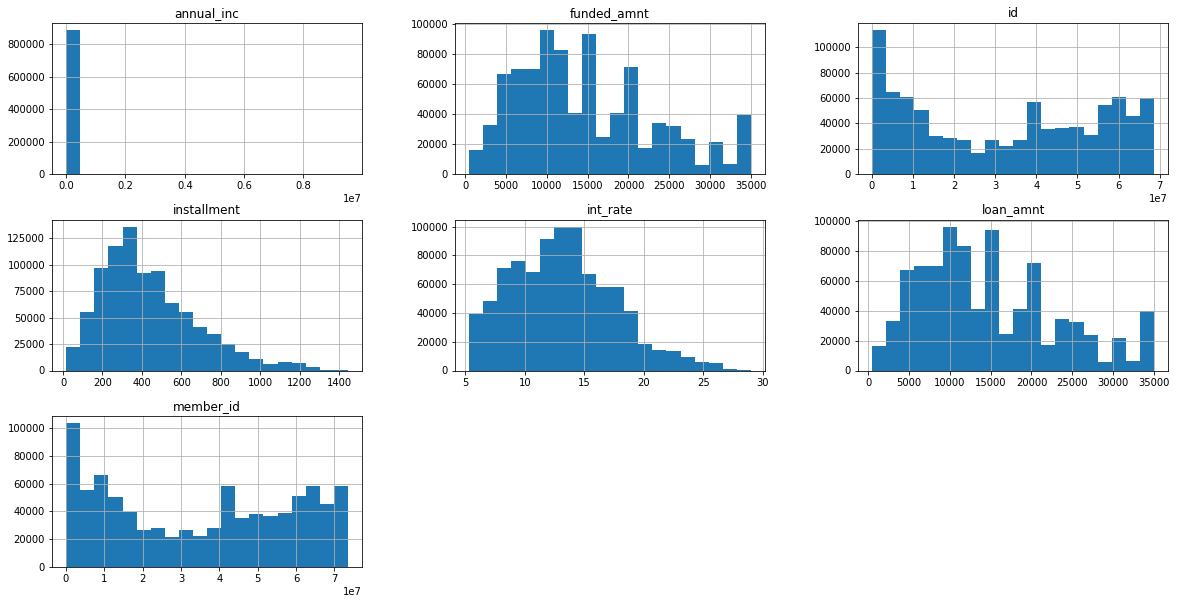

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
LoanDF.hist(figsize=(20,10), bins=20) # bins為長條組數, total 20 groups
plt.show() # 1e7 means 1*10^7

## Correlation and heatmap

In [8]:
LoanDF.corr()

,id,member_id,loan_amnt,funded_amnt,int_rate,installment,annual_inc
id,1.000000,0.999443,0.063803,0.066058,-0.142963,0.025347,0.033990
member_id,0.999443,1.000000,0.064461,0.066754,-0.142205,0.026036,0.034146
loan_amnt,0.063803,0.064461,1.000000,0.999263,0.145023,0.944977,0.332698
funded_amnt,0.066058,0.066754,0.999263,1.000000,0.145160,0.946005,0.332466
int_rate,-0.142963,-0.142205,0.145023,0.145160,1.000000,0.133075,-0.072786
installment,0.025347,0.026036,0.944977,0.946005,0.133075,1.000000,0.326182
annual_inc,0.033990,0.034146,0.332698,0.332466,-0.072786,0.326182,1.000000


#### 呈現屬性間的相關度

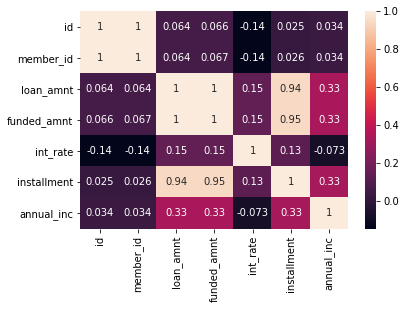

In [9]:
import seaborn as sns
loan_corr = LoanDF.corr()
sns.heatmap(loan_corr, xticklabels = loan_corr.columns, yticklabels = loan_corr.columns, annot=True)

#### 風險評等分布

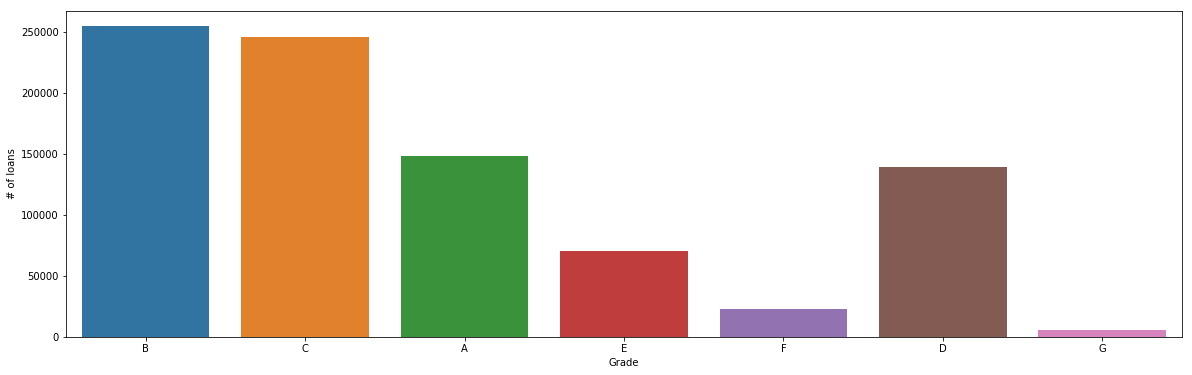

In [10]:
# Improve readability
fig,ax = plt.subplots(figsize=(20,6))
# Display a categorial histogram and label axes
sns.countplot(x='grade', data=LoanDF, ax=ax)
ax.set(xlabel='Grade', ylabel= '# of loans')
plt.show();

#### 借款理由以'債務合併/重組'為大宗

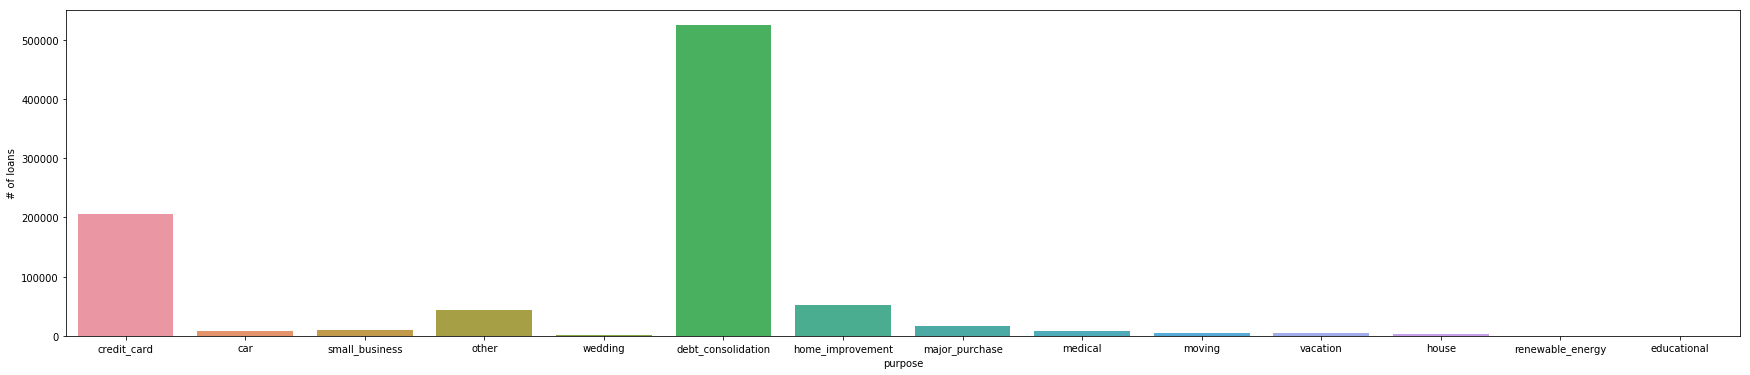

In [11]:
fig,ax = plt.subplots(figsize=(30,6))
sns.countplot(x='purpose', data=LoanDF, ax=ax)
ax.set(xlabel='purpose', ylabel= '# of loans')
plt.show();

#### 房屋所有權

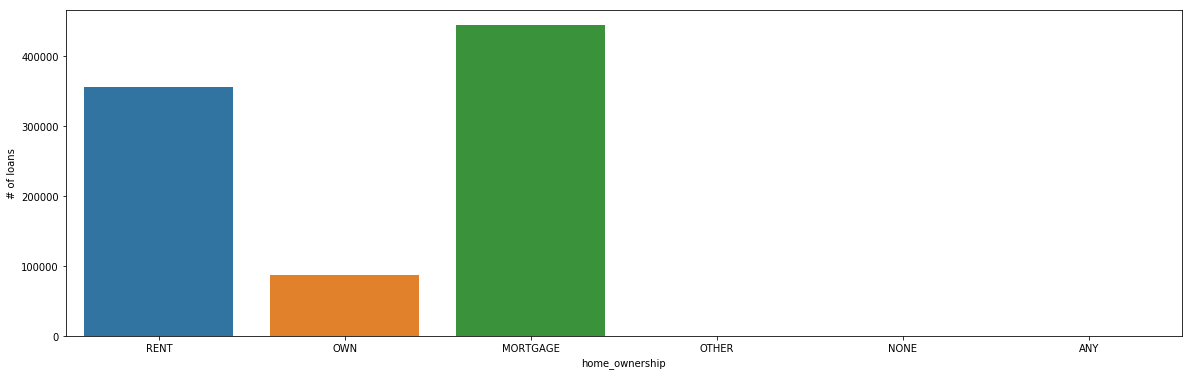

In [12]:
fig,ax = plt.subplots(figsize=(20,6))
sns.countplot(x='home_ownership', data=LoanDF, ax=ax)
ax.set(xlabel='home_ownership', ylabel= '# of loans')
plt.show();

#### 還款期限只限兩種

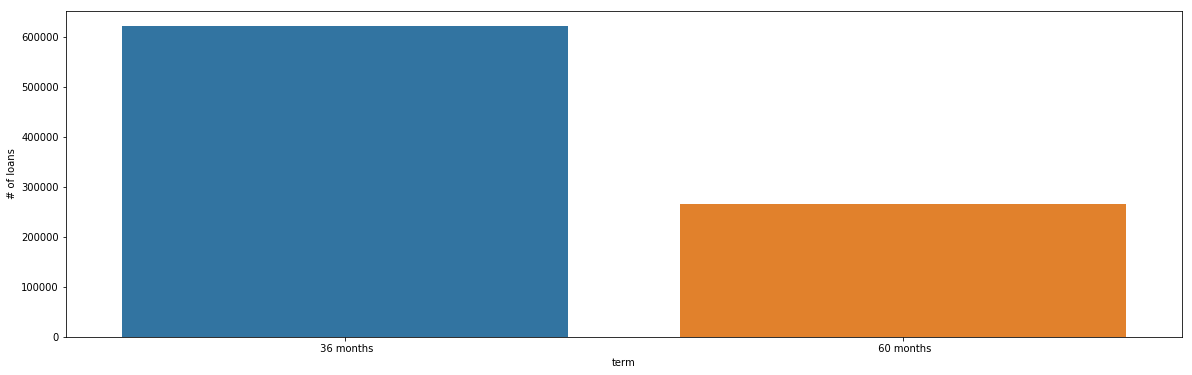

In [13]:
fig,ax = plt.subplots(figsize=(20,6))
sns.countplot(x='term', data=LoanDF, ax=ax)
ax.set(xlabel='term', ylabel= '# of loans')
plt.show();

#### 之前的借款紀錄

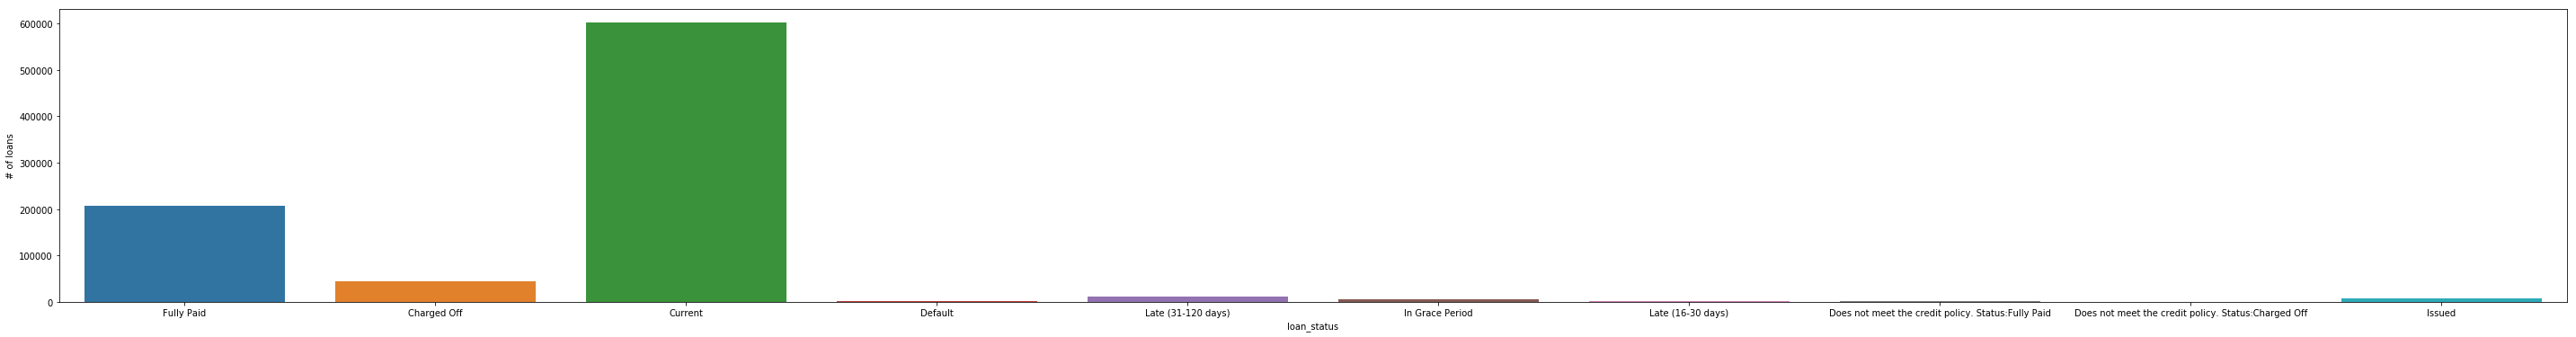

In [14]:
fig,ax = plt.subplots(figsize=(50,6))
sns.countplot(x='loan_status', data=LoanDF, ax=ax)
ax.set(xlabel='loan_status', ylabel= '# of loans')
plt.show();

#### 驗證借款紀錄是否屬實

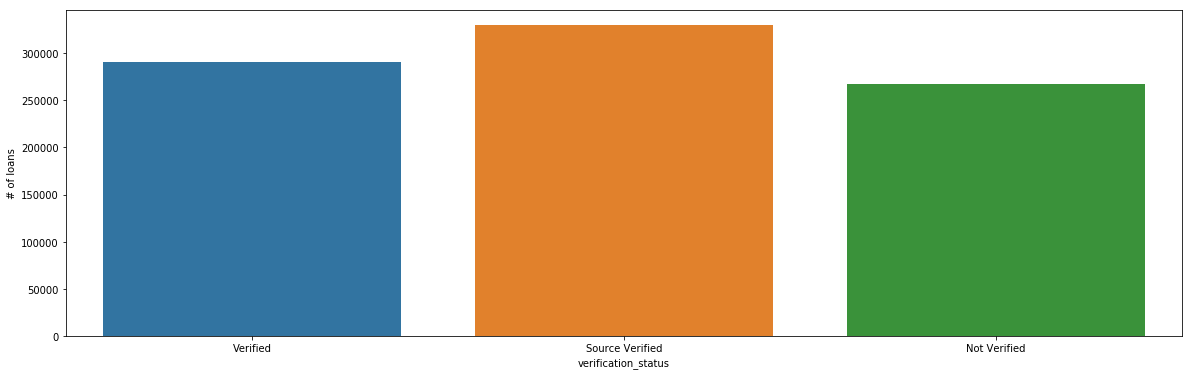

In [15]:
fig,ax = plt.subplots(figsize=(20,6))
sns.countplot(x='verification_status', data=LoanDF, ax=ax)
ax.set(xlabel='verification_status', ylabel= '# of loans')
plt.show();

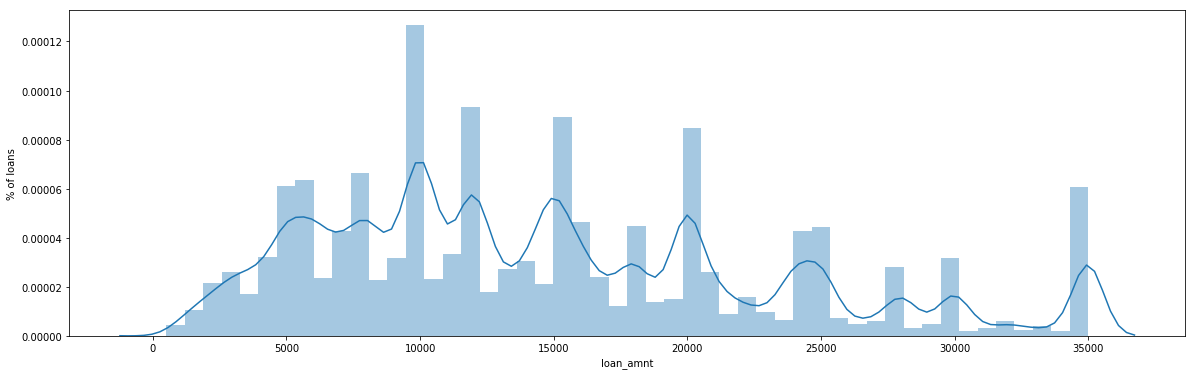

In [16]:
fig,ax = plt.subplots(figsize=(20,6))
sns.distplot(LoanDF['loan_amnt'])
ax.set(xlabel='loan_amnt', ylabel= '% of loans')
plt.show();

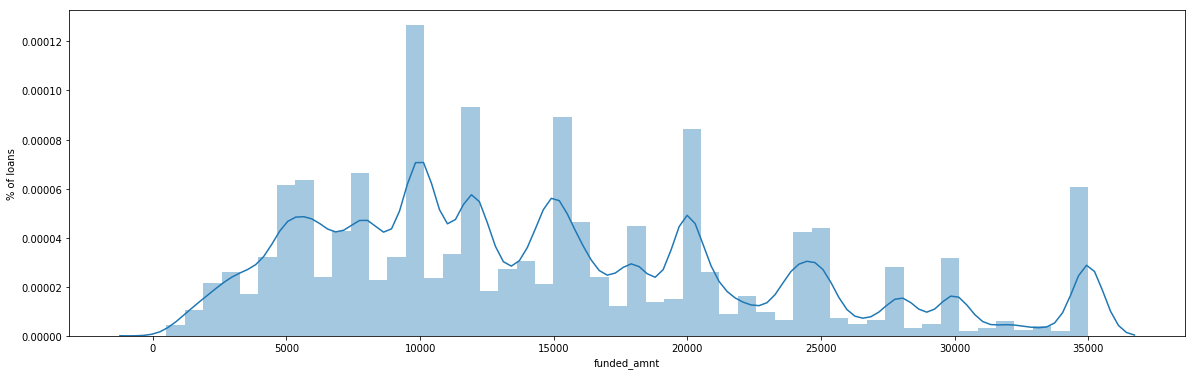

In [17]:
fig,ax = plt.subplots(figsize=(20,6))
sns.distplot(LoanDF['funded_amnt'])
ax.set(xlabel='funded_amnt', ylabel= '% of loans')
plt.show();

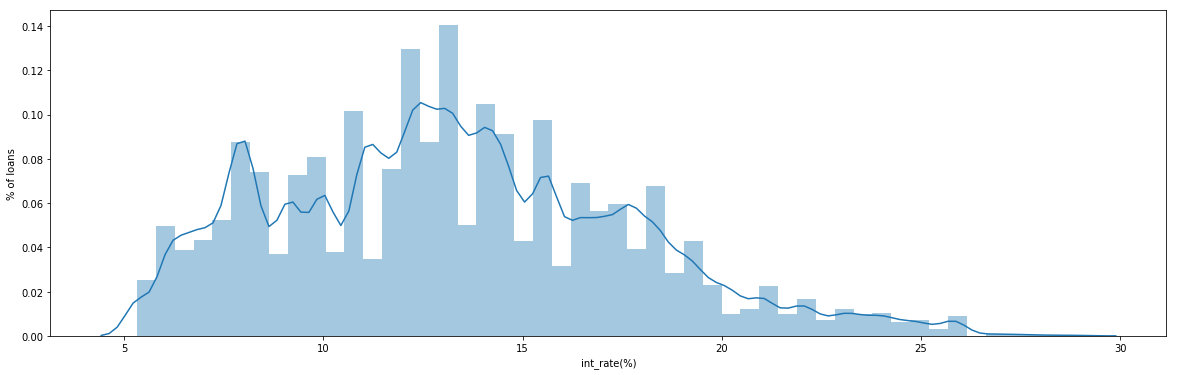

In [18]:
fig,ax = plt.subplots(figsize=(20,6))
sns.distplot(LoanDF['int_rate'])
ax.set(xlabel='int_rate(%)', ylabel= '% of loans')
plt.show();

In [19]:
# 先將sub_grade依照A1, A2等等排序
# 比免底下圖片x順序很奇怪
Loan_order = LoanDF.sort_values(by='sub_grade')

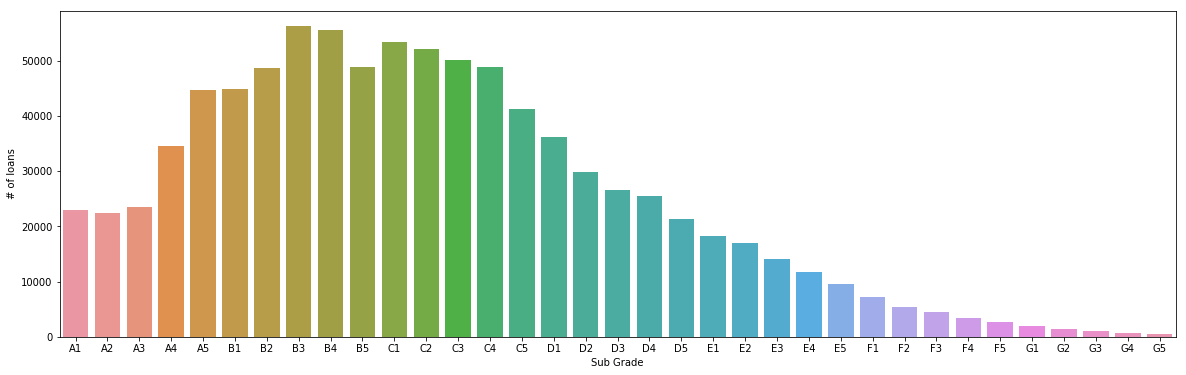

In [20]:
fig,ax = plt.subplots(figsize=(20,6))
# Display a categorial histogram and label axes
sns.countplot(x='sub_grade', data=Loan_order, ax=ax)
ax.set(xlabel='Sub Grade', ylabel= '# of loans')
plt.show();

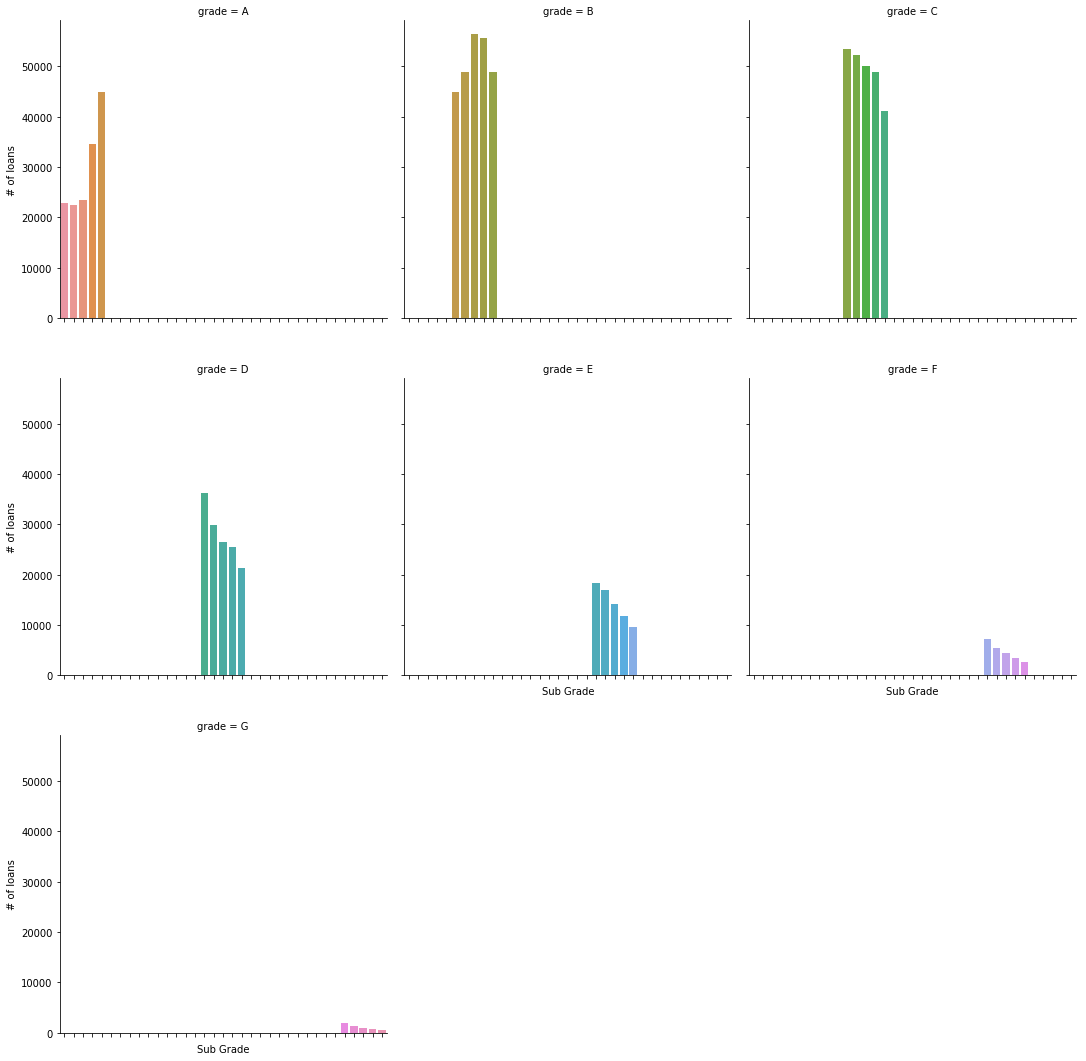

In [21]:
# set_xticklabels([]) 用於隱藏每張小圖下方的 xlabel
sns.catplot(x='sub_grade', data=Loan_order, col='grade', kind='count', col_wrap=3).set_axis_labels('Sub Grade', '# of loans').set_xticklabels([]);
# 設定上下sub plot的間距
plt.subplots_adjust(hspace = 0.2)

#### 可以看出80多萬筆資料內的grade分布

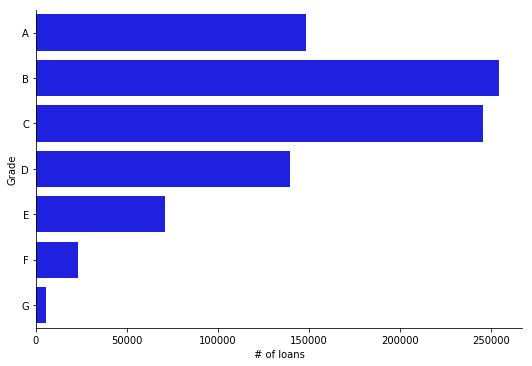

In [22]:
sns.catplot(y='grade', data=Loan_order, kind='count',
               aspect=1.5, height=5, color='blue').set_axis_labels('# of loans', 'Grade');

#### 依照個數來排序各風險階級的分布

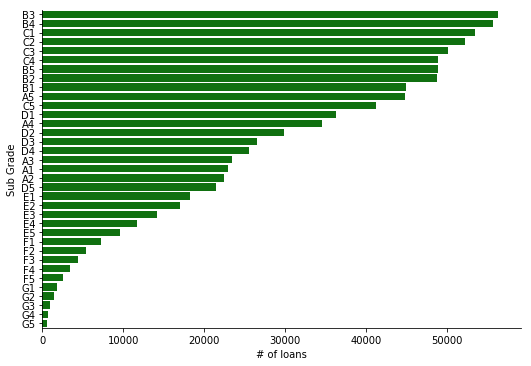

In [23]:
sns.catplot(y='sub_grade', data=Loan_order, kind='count',
               order=Loan_order['sub_grade'].value_counts().index, 
               aspect=1.5, height=5, color='green').set_axis_labels('# of loans', 'Sub Grade');

# 3. Feature Engineering

#### 將type為object的進行feature casting

In [24]:
LoanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 17 columns):
id                     887379 non-null int64
member_id              887379 non-null int64
loan_amnt              887379 non-null float64
funded_amnt            887379 non-null float64
int_rate               887379 non-null float64
installment            887379 non-null float64
grade                  887379 non-null object
sub_grade              887379 non-null object
term                   887379 non-null object
home_ownership         887379 non-null object
loan_status            887379 non-null object
purpose                887379 non-null object
verification_status    887379 non-null object
addr_state             887379 non-null object
zip_code               887379 non-null object
emp_length             887379 non-null object
annual_inc             887375 non-null float64
dtypes: float64(5), int64(2), object(10)
memory usage: 115.1+ MB


In [25]:
# 將用不到的欄位在這裡先drop
Y = LoanDF[['grade']]
LoanDF = LoanDF.drop('grade', axis=1)
LoanDF = LoanDF.drop('sub_grade', axis=1)
LoanDF = LoanDF.drop('id', axis=1)
LoanDF = LoanDF.drop('member_id', axis=1)
LoanDF = LoanDF.drop('funded_amnt', axis=1)
LoanDF = LoanDF.drop('addr_state', axis=1)
LoanDF = LoanDF.drop('zip_code', axis=1)
LoanDF = LoanDF.drop('installment', axis=1)

from sklearn.externals import joblib

In [26]:
def encode_features(df):
    features = ['term', 'home_ownership', 'loan_status', 'purpose', 'verification_status', 'emp_length']
    for feature in features:
        # df[feature] = df[feature].fillna('0')
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        # save each encoder with feature name
        # joblib.dump(le, 'encoder/le_%s.pkl' % feature)
        one_hot = preprocessing.OneHotEncoder()
        ohe = one_hot.fit(df[[feature]])
        feature_array = ohe.transform(df[[feature]]).toarray()
        # save each encoder with feature name
        # joblib.dump(ohe, 'encoder/ohe_%s.pkl' % feature)
        feature_labels = list(le.classes_)
        one_hot_features = pandas.DataFrame(feature_array, columns=feature_labels)
        df = pandas.concat([df, one_hot_features], axis=1)
        # drop舊的(concat前的, ex: term...)
        df = df.drop(feature, axis=1)
    return df


# feature
X = encode_features(LoanDF)

print(X.shape)
print(X.head(3))

(887379, 50)
   loan_amnt  int_rate  annual_inc   36 months   60 months  ANY  MORTGAGE  \
0     5000.0     10.65     24000.0         1.0         0.0  0.0       0.0   
1     2500.0     15.27     30000.0         0.0         1.0  0.0       0.0   
2     2400.0     15.96     12252.0         1.0         0.0  0.0       0.0   

   NONE  OTHER  OWN ...   2 years  3 years  4 years  5 years  6 years  \
0   0.0    0.0  0.0 ...       0.0      0.0      0.0      0.0      0.0   
1   0.0    0.0  0.0 ...       0.0      0.0      0.0      0.0      0.0   
2   0.0    0.0  0.0 ...       0.0      0.0      0.0      0.0      0.0   

   7 years  8 years  9 years  < 1 year  nan  
0      0.0      0.0      0.0       0.0  0.0  
1      0.0      0.0      0.0       1.0  0.0  
2      0.0      0.0      0.0       0.0  0.0  

[3 rows x 50 columns]


In [5]:
# Y (label)的sub_grade進行encoding
Y = pandas.get_dummies(data=Y, columns=['sub_grade'])
Y.head(5)

,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,...,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### joblib無法將get_dummies()以物件方式儲存

In [27]:
def Y_encode_features(df)
    features = ['grade']
    for feature in features:
        # sklearn僅接受1d array當label, 所以只做label encode不做one hot
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])  # Transform Categories Into Integers
        # joblib.dump(le, 'encoder/Yle_%s.pkl' % feature)
        one_hot = preprocessing.OneHotEncoder()
        ohe = one_hot.fit(df[[feature]])
        feature_array = ohe.transform(df[[feature]]).toarray()
        # joblib.dump(ohe, 'encoder/Yohe_%s.pkl' % feature)
        feature_labels = list(le.classes_)
        one_hot_features = pandas.DataFrame(feature_array, columns=feature_labels)
        df = pandas.concat([df, one_hot_features], axis=1)
        df = df.drop(feature, axis=1)
    return df


Y = Y_encode_features(Y)
Y.head(5)

,A,B,C,D,E,F,G
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# 4. Models

### 4-1Keras MLP

In [28]:
# dataframe to nd array
X = X.values
Y = Y.values

In [29]:
# 標準化
minMaxScale = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler = minMaxScale.fit(X)
# save minMaxScaler
# joblib.dump(scaler, "scaler/XminMAX.pkl")
X = scaler.transform(X)

In [30]:
X[0]

array([0.13043478, 0.22517955, 0.00252632, 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [31]:
Y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [32]:
# 將資料分成訓練組及測試組
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
# 建立模型
model = Sequential()
model.add(Dense(50, input_dim=50, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=X_train, y=y_train, validation_split=0.1, epochs=10, batch_size=5000, verbose=2)

Train on 559048 samples, validate on 62117 samples
Epoch 1/10
 - 3s - loss: 1.7274 - acc: 0.3035 - val_loss: 1.7175 - val_acc: 0.2853
Epoch 2/10
 - 1s - loss: 1.6611 - acc: 0.2871 - val_loss: 1.6392 - val_acc: 0.2853
Epoch 3/10
 - 1s - loss: 1.6359 - acc: 0.2871 - val_loss: 1.6336 - val_acc: 0.2853
Epoch 4/10
 - 1s - loss: 1.6331 - acc: 0.2871 - val_loss: 1.6321 - val_acc: 0.2853
Epoch 5/10
 - 1s - loss: 1.6322 - acc: 0.2871 - val_loss: 1.6315 - val_acc: 0.2853
Epoch 6/10
 - 1s - loss: 1.6319 - acc: 0.2871 - val_loss: 1.6314 - val_acc: 0.2853
Epoch 7/10
 - 1s - loss: 1.6318 - acc: 0.2871 - val_loss: 1.6313 - val_acc: 0.2853
Epoch 8/10
 - 1s - loss: 1.6318 - acc: 0.2871 - val_loss: 1.6313 - val_acc: 0.2853
Epoch 9/10
 - 1s - loss: 1.6318 - acc: 0.2871 - val_loss: 1.6313 - val_acc: 0.2853
Epoch 10/10
 - 1s - loss: 1.6318 - acc: 0.2871 - val_loss: 1.6313 - val_acc: 0.2853


In [35]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

### 顯示準確度隨epoch變化

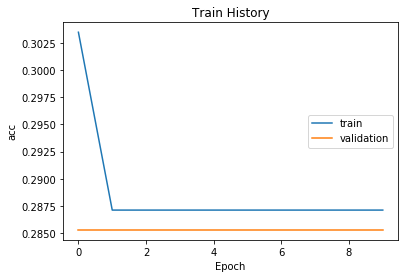

In [36]:
show_train_history(train_history, 'acc', 'val_acc')

### 顯示loss值隨epoch變化

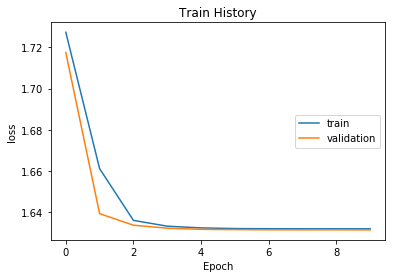

In [37]:
show_train_history(train_history, 'loss', 'val_loss')

### 驗證模型準確度

In [38]:
scores = model.evaluate(x=X_test, y=y_test)
scores[1]

266214/266214 [==============================] - 5s 19us/step


0.28657020291956775

## Save Model

In [ ]:
from keras.models import load_model
model.save('model/MLP_model.h5')

## Load Model

In [ ]:
# another way to laod model
loaded_model = load_model('model/MLP_model.h5')

### 驗證讀進來的模型準確度

In [ ]:
newScores =loaded_model.evaluate(x=X_test, y=y_test)
newScores[1]

### 4-2 DecisionTree

In [41]:
# 避免從df轉nd_array的過程中有產生inf/ nan值
X_train = numpy.nan_to_num(X_train)
X_test = numpy.nan_to_num(X_test)

In [42]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeModel = DecisionTreeClassifier().fit(X_train, y_train)

scores = DecisionTreeModel.score(X_test, y_test)

print(scores)

0.9541571818161328


### 4-3 SVM

In [ ]:
Clf = LinearSVC(multi_class='ovr')
Clf.fit(X_train, y_train)

scores = Clf.score(X_test, y_test)
print(scores)

### 4-4 KNN

In [ ]:
Clf = KNeighborsClassifier()
Clf.fit(X_train, y_train)

scores = Clf.score(X_test, y_test)
print(scores)

### 4-5 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# y只接受一維feature, 且這裡的y不能接受one hot encode
y_train = y_train.reshape(-1)
clf = LogisticRegression(random_state=0, solver='sag', multi_class='multinomial').fit(X_train, y_train)

scores_LR = clf.score(X_test, y_test)

print(scores_LR)

### 4-6 Model Comparison
| Model | Accuracy | Grade/Sub |
| :-----: | :-----: | :-----: |
| Decision Tree | 0.8622 | Sub Grade |
| Decision Tree | 0.9540 | Grade |
| SVM | Run Over 8 hrs | - |
| KNN | 0.66 (About 2 hrs) | Grade |
| Logistic Regression | 0.81 | Grade |

# 5. Predict

In [28]:
# 用訓練的標準化
# 測試label encode會不會與訓練的相同  or 將舊資料與新資料結合，重新跑一次encoding
# inverse label get dummy (prediction)結果